In [1]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
!pip install ipython-autotime

  Created wheel for ipython-autotime: filename=ipython_autotime-0.1-cp36-none-any.whl size=1832 sha256=8e6dd93a2db14de707f73c14ac2334a6346cd34194ff40ad0d56d1655696fd12
  Stored in directory: /root/.cache/pip/wheels/d2/df/81/2db1e54bc91002cec40334629bc39cfa86dff540b304ebcd6e
Successfully built ipython-autotime


In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
downloaded = drive.CreateFile({'id':'1z-7F1RO-CyLVDwpM-kI43h_Tu2pPkYft'})
downloaded.GetContentFile('lemons.jpg')

In [16]:

from skimage.feature import peak_local_max
from skimage.morphology import watershed
from scipy import ndimage
import numpy as np
import cv2
import imutils

time: 1.81 ms


In [17]:
%load_ext autotime
image = cv2.imread('lemons.jpg')

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 8.73 ms


In [18]:
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
hsv = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
l_b = np.array([0,139,32])
u_b = np.array([60,255,255])
thresh = cv2.inRange(hsv,l_b,u_b)
res = cv2.bitwise_and(image,image,mask = thresh)

time: 6.44 ms


In [19]:
from google.colab.patches import cv2_imshow

time: 604 µs


In [20]:
D = ndimage.distance_transform_edt(thresh)
localMax = peak_local_max(D, indices=False, min_distance=20,
	labels=thresh)


markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
labels = watershed(-D, markers, mask=thresh)
print(" {} LEMONS FOUND".format(len(np.unique(labels)) - 1))


for label in np.unique(labels):
  
	if label == 0:
		continue
	
	mask = np.zeros(gray.shape, dtype="uint8")
	mask[labels == label] = 255
	# detect contours in the mask and grab the largest one
	cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
		cv2.CHAIN_APPROX_SIMPLE)
	cnts = imutils.grab_contours(cnts)
	c = max(cnts, key=cv2.contourArea)
    
	((x, y), r) = cv2.minEnclosingCircle(c)
	cv2.circle(image, (int(x), int(y)), int(r), (0, 255, 0), 2)
	cv2.putText(image, "{}".format(label), (int(x) - 10, int(y)),cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)

 6 LEMONS FOUND
time: 43.4 ms


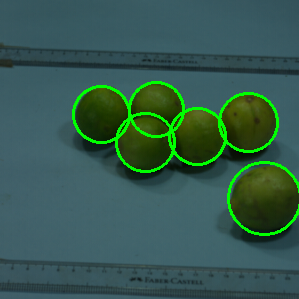

Image with lemon count
time: 63.3 ms


In [21]:
cv2_imshow(image)
print('Image with lemon count')